In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
num_timesteps = 30_000_000

eval_reward_files = {
    'dense_eval_rew': 'dense_eval_rew.csv',
    'denseRND_eval_rew': 'denseRND_eval_rew.csv',
    'sparse_eval_rew': 'sparse_eval_rew.csv', 
    'sparseRND_eval_rew': 'sparseRND_eval_rew.csv',
    'RND_eval_rew': 'RND_eval_rew.csv'
}

int_reward_files = {
    'dense_int_rew': 'dense_int_rew.csv',
    'denseRND_int_rew': 'denseRND_int_rew.csv',
    'sparseRND_int_rew': 'sparseRND_int_rew.csv',
    'sparse_int_rew': 'sparse_int_rew.csv', 
}

eval_rewards = {
    name: pd.read_csv(path).query("Step < @num_timesteps")['Value'].to_numpy()
    for name, path in eval_reward_files.items()
}

int_rewards = {
    name: pd.read_csv(path)['Value'].to_numpy()
    for name, path in int_reward_files.items()
}

In [16]:
def smooth_ema(values, weight=0.99):
    smoothed = []
    last = values[0]
    for val in values:
        smoothed_val = last * weight + (1 - weight) * val
        smoothed.append(smoothed_val)
        last = smoothed_val
    return np.array(smoothed)

<Figure size 2000x480 with 0 Axes>

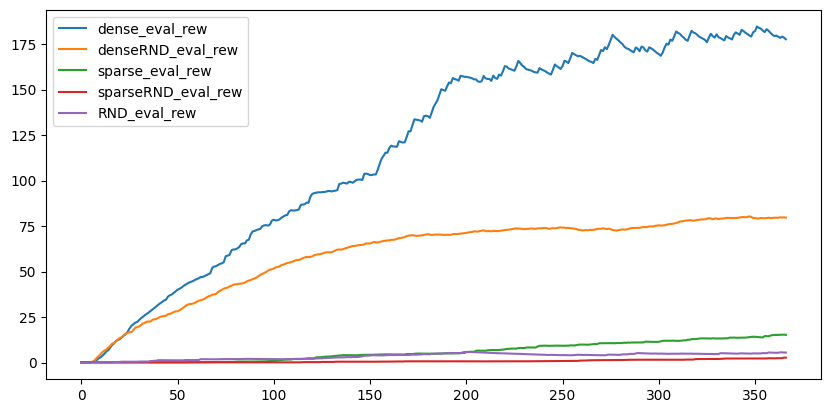

In [21]:
plt.figure().set_figwidth(20)
plt.figure().set_figwidth(10)
for key, val in eval_rewards.items():
    if key == 'RND_eval_rew':
        plt.plot(smooth_ema(val[::2]), label=key)
    else:
        plt.plot(smooth_ema(val), label=key)
plt.legend()

<Figure size 2000x480 with 0 Axes>

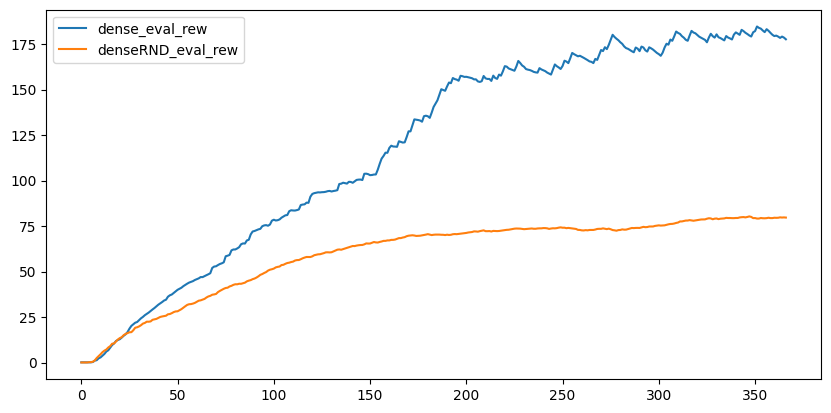

In [22]:
plt.figure().set_figwidth(20)
plt.figure().set_figwidth(10)
for key, val in eval_rewards.items():
    if 'dense' in key:
        plt.plot(smooth_ema(val), label=key)
plt.legend()

<Figure size 2000x480 with 0 Axes>

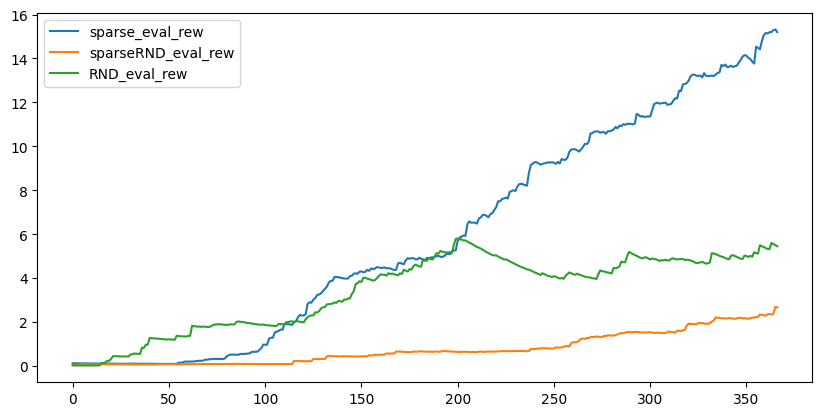

In [23]:
plt.figure().set_figwidth(20)
plt.figure().set_figwidth(10)
for key, val in eval_rewards.items():
    if key == 'RND_eval_rew':
        plt.plot(smooth_ema(val[::2]), label=key)
    if 'sparse' in key:
        plt.plot(smooth_ema(val), label=key)
plt.legend()

<Figure size 2000x480 with 0 Axes>

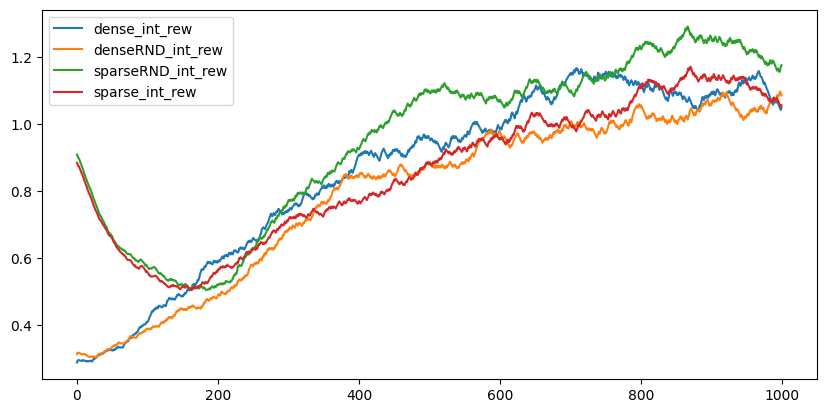

In [7]:
plt.figure().set_figwidth(20)
plt.figure().set_figwidth(10)
for key, val in int_rewards.items():
    plt.plot(smooth_ema(val), label=key)
plt.legend()

<Figure size 2000x480 with 0 Axes>

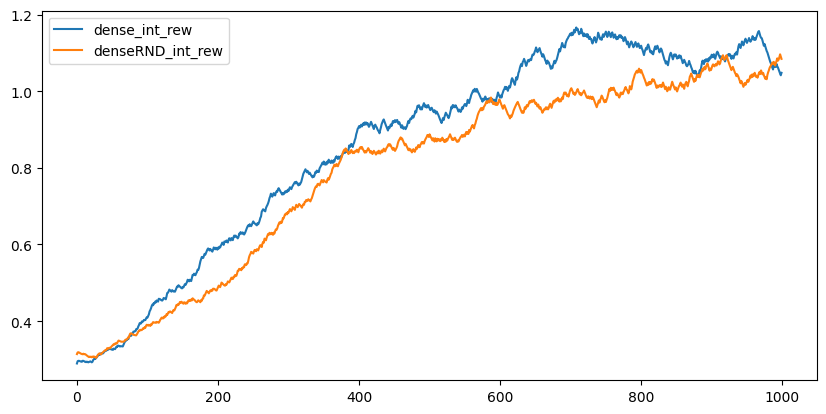

In [8]:
plt.figure().set_figwidth(20)
plt.figure().set_figwidth(10)
for key, val in int_rewards.items():
    if 'dense' in key:
        plt.plot(smooth_ema(val), label=key)
plt.legend()

<Figure size 2000x480 with 0 Axes>

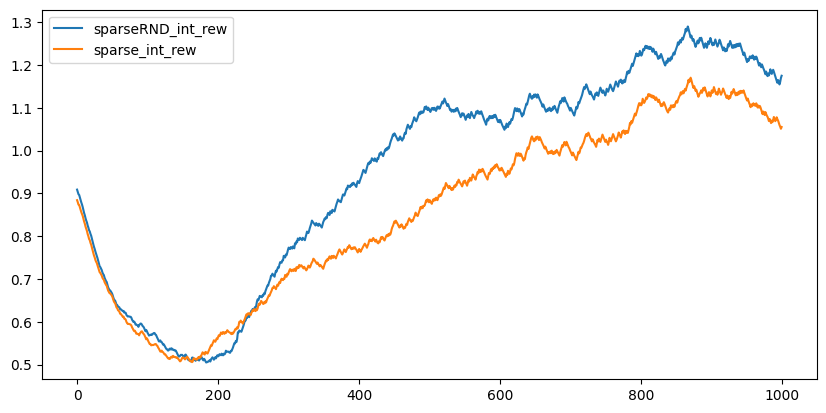

In [9]:
plt.figure().set_figwidth(20)
plt.figure().set_figwidth(10)
for key, val in int_rewards.items():
    if 'sparse' in key:
        plt.plot(smooth_ema(val), label=key)
plt.legend()